## Python ML Group - Week03. 로지스틱회귀 (Logistic regression)


로지스틱회귀는 분류 문제를 다룹니다.

분류문제에서는 어떤 입력 데이터가 주어졌을 때 0 또는 1 을 예측합니다.

예를들면 환자의 종양의 크기를 가지고 그 종양이 악성종양인지 아닌지를 판단하는 문제는 분류문제이고 로지스틱회귀로(도) 다룰 수 있습니다.

입력데이터의 피처가 여러개인 경우도 있습니다.

---

예를들어 알콜중독인지 아닌지를 판단하는 [진단 테스트](http://www.alcohol114.com/self.htm)가 있습니다.

Q1.술을 얼마나 자주 마십니까?

A. 전혀 안마심 (0 점)   B. 월 2~4회 (2 점)   C. 주 4희 (4점)

Q2.지난 일년간 한번 술을 마시기 싲가하면 멈출 수 없던던 때가 자주 있습니까?

A. 없음(0 점)   B. 월 1회 (2 점)   C. 거의 매일 (4점)

두 질문으로 부터 나온 점수를 x1, x2 라고  x1 + x2 의 값이  4 점 이상이면 알콜  중독으로 판단하는 테스트입니다.

이 테스트에서 입력 데이터의 피처는 x1 과 x2 두 개이고 판단하는 방법(가설)은 다음과 같습니다.

$W_1 * x1 + W_2 * x2 + bias > 0$

$ x1 + x2 - 4 > 0$

만약 두 번째 질문에 더 높은 점수를 부여하고 싶다면 두 번쨰 가중치 $W_2$ 의 값을 크게 만들면 됩니다.

약 테스트의 정확도(precision)를 높이고 싶으면 바이어스를 -4에서 더 낮추면 됩니다.
이렇게 가중치과 바이어스를 적당한 값으로 조절하는 것이 머신러닝 과정에서 이루어집니다.

위의 알콜중독 테스트는 실제로 있는 문항과 점수표이며 총 10개의 문제에서 20점 이상을 심각한 알콜중독으로 판단합니다. 

알중중독 여부를 판단하는 분류 문제이지만 사실 위의 분류에서는 선형회귀를 사용했고 분류 문제에 적합하지 않습니다.

왜냐하면 위의 문항의 점수는 어떤 범위 안에 한정되어 있지만 실제 데이터의 입력값에서는 범위의 제한이 없습니다.
따라서 가설함수의 출력값도 제한이 없습니다. 

실제로 판단하는 것은 가설함수의 값이 0 보다 큰지 아닌지인데, 특정 데이터에 대한 가설함수의 값이 굉장이 큰 값이 나오면 선형회귀에서는 파라미터(가중치, 바이어스)가 크게 영향을 받습니다.

그래서 가설함수의 출력값을 (0, 1) 구간으로 제한을 두는 방법을 분류문제에서 사용하는 것이 적합합니다.

실수 전체 구간을 (0, 1) 구간의 범위로 제한시켜주는 하나의 방법은 sigmoid 라는 함수를 사용하는 것입니다.

함수의 모습은 다음 그래프에서 그렸습니다.

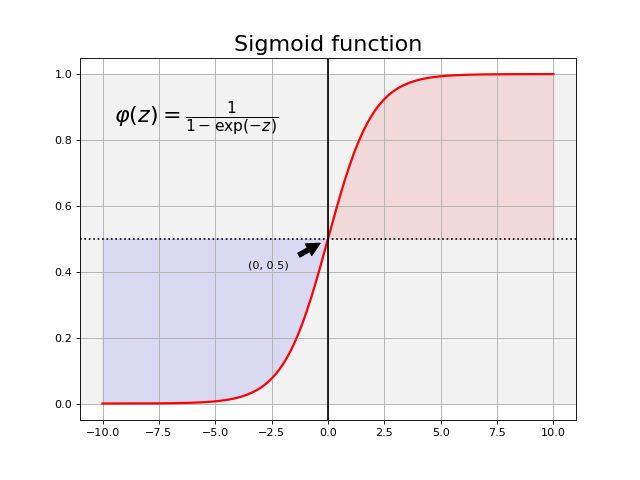

In [2]:
from IPython.display import Image
Image('../images/figures/fig_sigmoid1.png', width=600)

모듈을 사용해서 머신러닝을 할때는 선형회귀와 로지스틱회귀의 차이는 사용하는 클래스의 차이 뿐입니다.

그래서 사실 각각의 수학적의 내용과 의미를 이해하지 못하더라도 분류 문제에 머신러닝을 사용하는데는 전혀 문제가 없습니다.

그래도 수학적으로 어떤 차이가 있는지 기술을 해두겠습니다.

**<선형회귀>**

가설 : $h_W(X) = W_0 + W_1 x_1 + W_2 x_2 + ... + W_n x_n = W^T x$    

비용함수 : $J(W) = \frac{1}{2m} \sum (h_W(x) - y )^2$

(간단하게 표현하기 위해서 바이어스를 가중치에 포함시켜서 표현했습니다.)


**<로지스틱회귀>**

가설 : $h_W(X) = \varphi (z) = \frac{1}{1-\exp(-z)}$ ,  $z = W_0 + W_1 x_1 + W_2 x_2 + ... + W_n x_n = W^T x$    

비용함수 :  $J(W) = \frac{1}{m} \sum -y \log(h_W(x)) -(1-y) \log(1 -1 h_W(x))$ 


## 1. 간단한 데이터

실습의 시작은 항상 가장 간단한 데이터로 하는 것이 좋습니다.

인터넷에서 통계 데이터나 실측 데이터를 가져와서 실습하면 생각하지 못한 난관에 부딪치게 됩니다.

데이터를 pandas 나 numpy 배열로 만들기 위해서 인코딩, 포맷팅, 파싱도 해야하고 데이터를 정규화해야할 필요가 있을 수도 있습니다.

간단한 로지스틱회귀 실습에서 사용할 데이터는 다음과 같습니다.   그래프를 그려서 시각화해보겠습니다.

0 : (1, 1), (1, 2), (2, 1)

1 : (1, 3), (2, 2), (2, 3)


X 의 피처가 2개인 이진분류 데이터를 시각화 할 때에는 Y 값이 0인 데이터와 Y 값이 1인 데이터를 나눠서 다른 마커로 그려주면 2차원 평면상에서 데이터를 시각화할 수 있습니다.

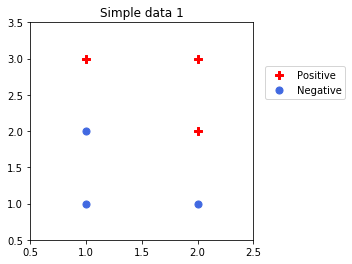

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_binary(X, Y, title='', size=10):
    fig, ax = plt.subplots(figsize=plt.figaspect(1))
    pos = np.where(Y == 1)
    neg = np.where(Y == 0)
    ax.scatter(X[pos, 0], X[pos, 1], marker='P', s=size, c='red', label='Positive')
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=size, c='royalblue', label='Negative')
    ax.set_xlim(X[:,0].min() - 0.5, X[:,0].max() + 0.5)
    ax.set_ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)
    ax.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0) 
    ax.set_title(title)
    plt.show()

X = np.array([[1, 1], [1, 2], [2, 1],
             [1, 3], [2, 2], [2, 3]])

Y = np.array((0, 0, 0, 1, 1, 1))

plot_binary(X, Y, 'Simple data 1', 50)

먼저 사이킷런의 linear_model 모듈에서 제공하는 로지스틱회귀 클래스를 사용해서 데이터를 훈련시켜보겠습니다.

옵션 중에서 C 는 오버피팅을 억제하기 위한 파라미터로 C 가 작은 값일 수록 피팅을 일반화합니다.

penalty 옵션도 오버피팅에 관련된 것인데 l2 옵션은 비용 함수에 기중치의 제곱항을 더해준다는 의미입니다.

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e6)
logreg.fit(X, Y)


LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

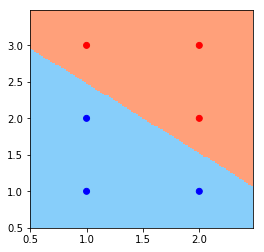

In [9]:
# define colormaps for plot
from matplotlib.colors import LinearSegmentedColormap
cm_field = LinearSegmentedColormap.from_list('field', ['lightskyblue', 'lightsalmon'], N=2)
cm_data = LinearSegmentedColormap.from_list('data', ['blue', 'red'], N=2)

step = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 4))
plt.pcolormesh(xx, yy, Z, cmap=cm_field)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_data)
plt.show()

정확도는 위의 그래프에서 보다시피 1.0 입니다.

계산해보겠습니다.

In [10]:
from sklearn.metrics import accuracy_score, classification_report

pred = logreg.predict(X)
print('Predictions : ',pred)

print('Accuracy : ', accuracy_score(pred, Y))

Predictions :  [0 0 0 1 1 1]
Accuracy :  1.0


정확도 뿐만아니라 사이킷런에서는 더 상세한 레포트를 제공합니다.

각 분류 클래스 별로 정확도와, 재현율, 그리고 F1 값을 얻을 수 있습니다.

In [11]:
target_names = ['negative', 'positive']
print(classification_report(Y, pred, target_names=target_names))

             precision    recall  f1-score   support

   negative       1.00      1.00      1.00         3
   positive       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         6



## 2.더 많은 데이터



In [13]:
# 데이터는 아래의 url에서 텍스트 파일로 얻을 수 있습니다.
#https://github.com/pinkmaguro/ml-practice/blob/master/data/logistic_data1.txt
data = np.loadtxt('../data/logistic_data1.txt', delimiter=',') 

X = data[:,:data.shape[1] - 1]; print(X.shape)  #X = data[:, 0:2]
Y = data[:,data.shape[1] - 1:]; print(Y.shape)  #y = data[:, 2]

(100, 2)
(100, 1)


In [14]:
print(X[:5,:])
print(Y[:5,:])

[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


데이터를 살펴보니 X 는 (x1, x2) 형태의 피쳐가 두 개입니다. 

참고로 x1 은 중간고사의 점수 x2 는 기말고사의 점수로 레이블 1은 합격, 레이블 0은 불합격을 의미합니다.

x1 과 x2 의 스케일이 어느정도 비슷하고 숫자의 크기도 크지 않으니 우선 데이터를 정규화하지 않고 그냥 회귀를 해보겠습니다.

데이터를 눈으로 확인했으니 시각화도 해보겠습니다.

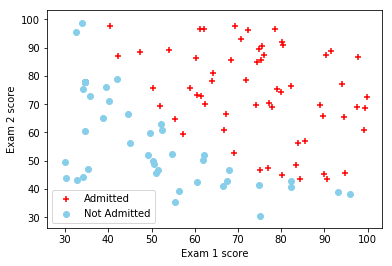

In [16]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='r')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='skyblue')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

이번에도 간단한 데이터의 실습에서와 같이 **sklearn.linear_model.LogisticRegression** 클래스를 분류기로 사용해서 분류된 영역을 그래프에 함께 표시해보겠습니다.

이 과정은 반복해서 사용하므로 함수를 정의합니다.


입력데이터 X 만 가지고 회귀를 한다면 선형관계만 훈련시킬 수 있습니다.

함수에는 추가로 다항 회귀를 할 수 있도록 차수도 인자로 입력받게 합니다.

X 데이터를 최고 n 차의 항까지 만들어주는 사이킷런의 클래스 **PolynomialFeatures** 를 사용하는 것이 편합니다. 

PolynomialFeatures 에서는 바이어스 항도 추가해줍니다.

아래는 PolynomialFeatures 클래스의 사용예입니다.


In [17]:
from sklearn.preprocessing import PolynomialFeatures

X_test = np.arange(6).reshape(3,2)


ndim = 2

poly = PolynomialFeatures(ndim)

X_test_poly = poly.fit_transform(X_test)

print('X_test\n', X_test)
print('X_test_poly\n ', X_test_poly)


X_test
 [[0 1]
 [2 3]
 [4 5]]
X_test_poly
  [[  1.   0.   1.   0.   0.   1.]
 [  1.   2.   3.   4.   6.   9.]
 [  1.   4.   5.  16.  20.  25.]]


In [18]:
def plot_binaryMesh(clf, X, y, p=1, ax=None):
    """
    Plot binary labled data in 2D area

    Parameters
    ==========
    X : (m, 2) ndarray
    y : (m, ) ndarray
    p : polynomial dimension
    C : consider this as an inverse of lambda_ , regularization term for penalty
    """
    from sklearn import linear_model, metrics
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(p)
    X_poly = X
    if p >= 1:
        X_poly = poly.fit_transform(X)

    clf.fit(X_poly,y.ravel())
    
    prediction = clf.predict(X_poly)
    accuracy = metrics.accuracy_score(prediction, y)
    
    target_names = ['negative', 'positive']
    report = metrics.classification_report(Y, prediction, target_names=target_names)
        
    pts = 200
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts), np.linspace(y_min, y_max, pts))
    Z = clf.predict( poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])[:,:]  )

    cm_field = LinearSegmentedColormap.from_list('field',['lightskyblue', 'lightsalmon'], N=2)
    cm_data = LinearSegmentedColormap.from_list('data', ['blue', 'red'], N=2)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = ax
    if ax is None:
        plt.figure(1, figsize=(6, 6))
        ax = plt.gca()
    
    ax.pcolormesh(xx, yy, Z, cmap=cm_field)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cm_data)
    ax.annotate('Accuracy : {:0.2f}'.format(accuracy),
        xy=(0,0),
        xytext=(0.05, 0.05), textcoords='axes fraction', fontsize=20)
    ax.annotate('Poly : {}'.format(p),
        xy=(0,0),
        xytext=(0.05, 0.90), textcoords='axes fraction', fontsize=20)

    return accuracy, report, clf

### 1차항 까지 사용한 분류 회귀 결과

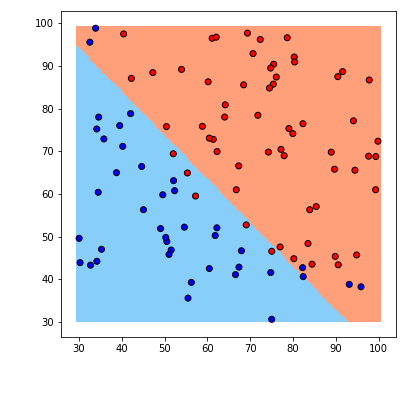

In [19]:
clf = LogisticRegression(C=1e5)

plot_binaryMesh(clf, X, Y, 1)
plt.show()

총 100 개의 샘플을 가지고 선형 분류를 한 결과 정확도가 0.89 입니다.

11 개의 샘플이 잘 못 분류되었습니다.

직선이 아닌 곡선을 사요하면 정확도를 더 높일 수 있을 것으로 기대합니다.

편리한 함수를 만들었으니 손쉽게 곡선을 사용한 분류도 가능합니다. 

입력데이터의 피처의 2차항까지 사용해서 회귀해보겠습니다.

### 2차항 까지 사용한 분류 회귀 결과

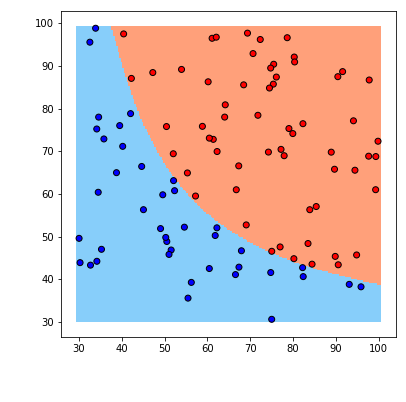

In [20]:
clf = LogisticRegression(C=1e5)

plot_binaryMesh(clf, X, Y, 2)
plt.show()


모든 샘플이 정확하게 분류되어서 정확도 1.0 을 얻었습니다.


더 복잡한 곡선으로 회귀를 할 수 있지만 이미 가장 높은 정확도를 얻었기 때문에 더 진행할 이유는 없습니다.

##  3.서로 섞여있는 데이터

사이킷 런에서는 분류회귀에 사용할 수 있는 랜덤한 데이터를 만들 수 있는 함수들을 제공합니다.



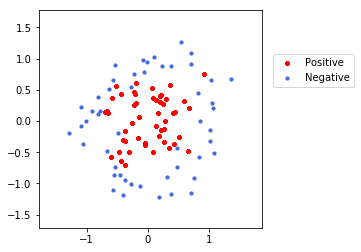

In [29]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=137)
plot_binary(X, Y)


이번에도 LogisticRegression 클래스를 사용해서 분리해보겠습니다.

입력 데이터를 2차원에서 7차원까지 피처항을 늘려가면서 실험해보겠습니다.

clf = LogisticRegression(C=1e5)


In [30]:

def plot_binaryMesh_poly(clf, X, Y, polys, ncols=2, title=None):
    import matplotlib.ticker as ticker
    n = len(polys)
    nrows = int(np.ceil(n/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows), dpi=150) 
    plt.subplots_adjust(hspace=0.5)

    for i in range(n):
        row, col = i // ncols, i % ncols
        ax = axes[row][col]
        plot_binaryMesh(clf, X, Y, polys[i], ax)
        if not title is None:
            ax.set_title(title[i])
    plt.show()

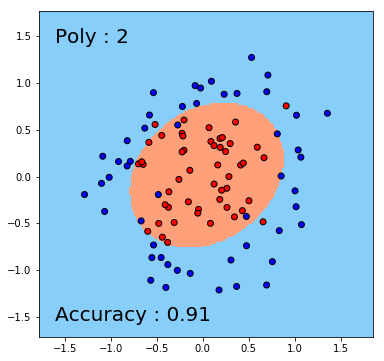

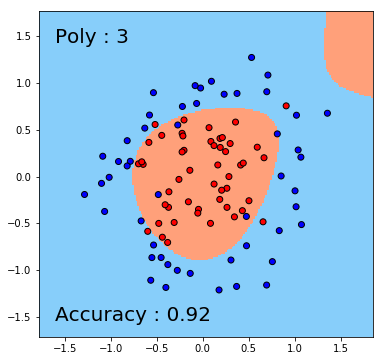

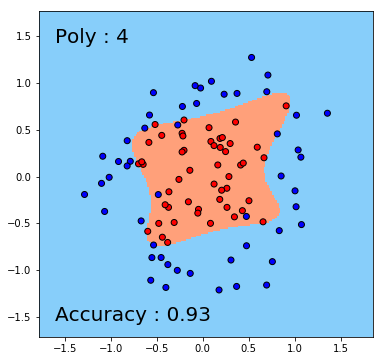

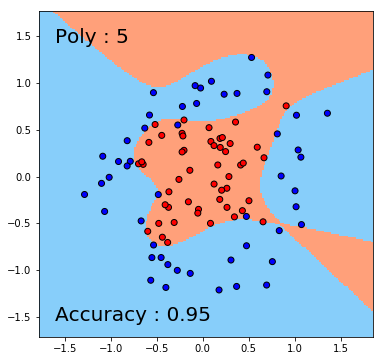

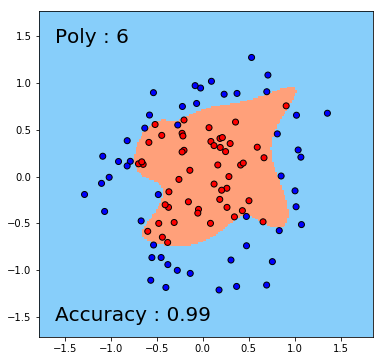

In [31]:
clf = LogisticRegression(C=1e5)

plot_binaryMesh(clf, X, Y, 2)
plt.show()
plot_binaryMesh(clf, X, Y, 3)
plt.show()
plot_binaryMesh(clf, X, Y, 4)
plt.show()
plot_binaryMesh(clf, X, Y, 5)
plt.show()
plot_binaryMesh(clf, X, Y, 6)
plt.show()

입력 데이터의 다항 차수를 높일 수록 정확도가 높아지는 것을 알 수 있습니다.

그대신 새로운 데이터에 대해서 예측률이 낮아지는 오버피팅 문제가 발생합니다.

오버피팅을 줄일려면 간단하게는 분류기에 넣는 파라미터 C 의 값을 낮게 하면 됩니다.

C 값을 너무 낮추면 이번에는 반대로 high bias 상태가 됩니다.  훈련시킨 데이터도 새로운 데이터도 예측을 잘 못하게 됩니다.

검증 데이털르 사용해서 머신러닝 시스템은 파라미터를 조절하는 것을 튜닝이라고 하는데, 이 부분은 다른 노트에서 다루겠습니다.

## 4. 사이킷런의 여러 종류의 분류기

분류기에는 여러가지 종류가 있어서 데이터의 특성에 맞게 선택할 수 있습니다.
아래는 사이킷런에서 제공하는 분류기입니다.

In [32]:

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


이중에서 범용으로 많이 사용하는 서포트 벡터 머신의 클래스 SVC 를 사용해서 같은 데이터를 분류해보겠습니다.


[sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

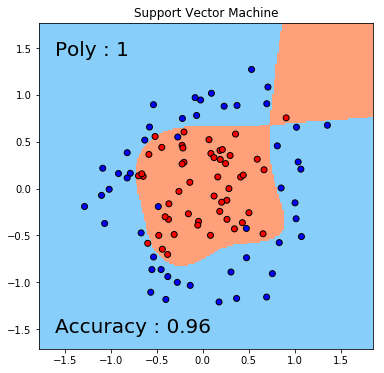

In [33]:
clf = SVC(C=1e5)
plot_binaryMesh(clf,X, Y,1)
plt.title('Support Vector Machine')
plt.show()

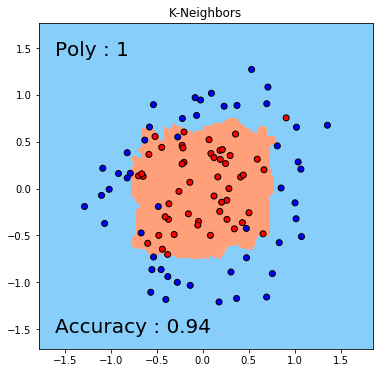

In [34]:
clf = KNeighborsClassifier()
plot_binaryMesh(clf,X, Y,1)
plt.title('K-Neighbors')
plt.show()

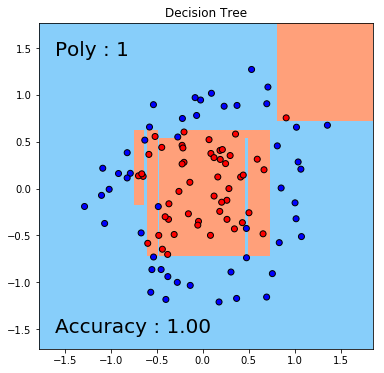

In [35]:
clf = DecisionTreeClassifier()
plot_binaryMesh(clf,X, Y,1)
plt.title('Decision Tree')
plt.show()

서포트 벡터 머신으로 분류를 할 때는 오버피팅을 제어하는 파라미터인 C 값과 gamma 값을 조절합니다.

C 값이 작을 수록 gamma 값은 클 수록 덜 오버피팅 된 결과를 얻을 수 있습니다.

서포트 벡터 머신에서는 커널도 설정할 수가 있는데,

위에서 사용한 커널은 default 커널인 'rbf' 커널이고 가우시안 커널이라고도 합니다.


각 분류기의 특성은 분류의 경계선으로 보면 어느정도 이해할 수가 있는데 다른 기회에 설명하기로 하겠습니다.

분류의 경계선은 decidion boundary 이고  hypothesis 의 값이 0.5가 되는 값으로 높이가 1인 산의 중간을 칼로 베었을 때의 단면이라고 상상하시면 됩니다.

분류 회귀에 관해서 다룰 내요을 많지만 우선 기본적인 내용만 이번 실습에 포함시켰습니다.

여러개의 종류를 분류해야 할 때 복잡한 신경망을 사용해서 해결할 수도 있지만 

방금 실습한 분류 회귀에 one vs all 전략을 사용하면 분류할 수가 있습니다.
